In [43]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore
from sklearn.datasets import load_boston
from sklearn.cross_validation import train_test_split
from sklearn.metrics import mean_squared_error

from jit_model.jit_model import JitModel



The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
boston = load_boston()
data = pd.DataFrame(boston.data,columns=boston.feature_names)

y = boston.target
X = np.array(data)
y = zscore(y)
X = zscore(X)

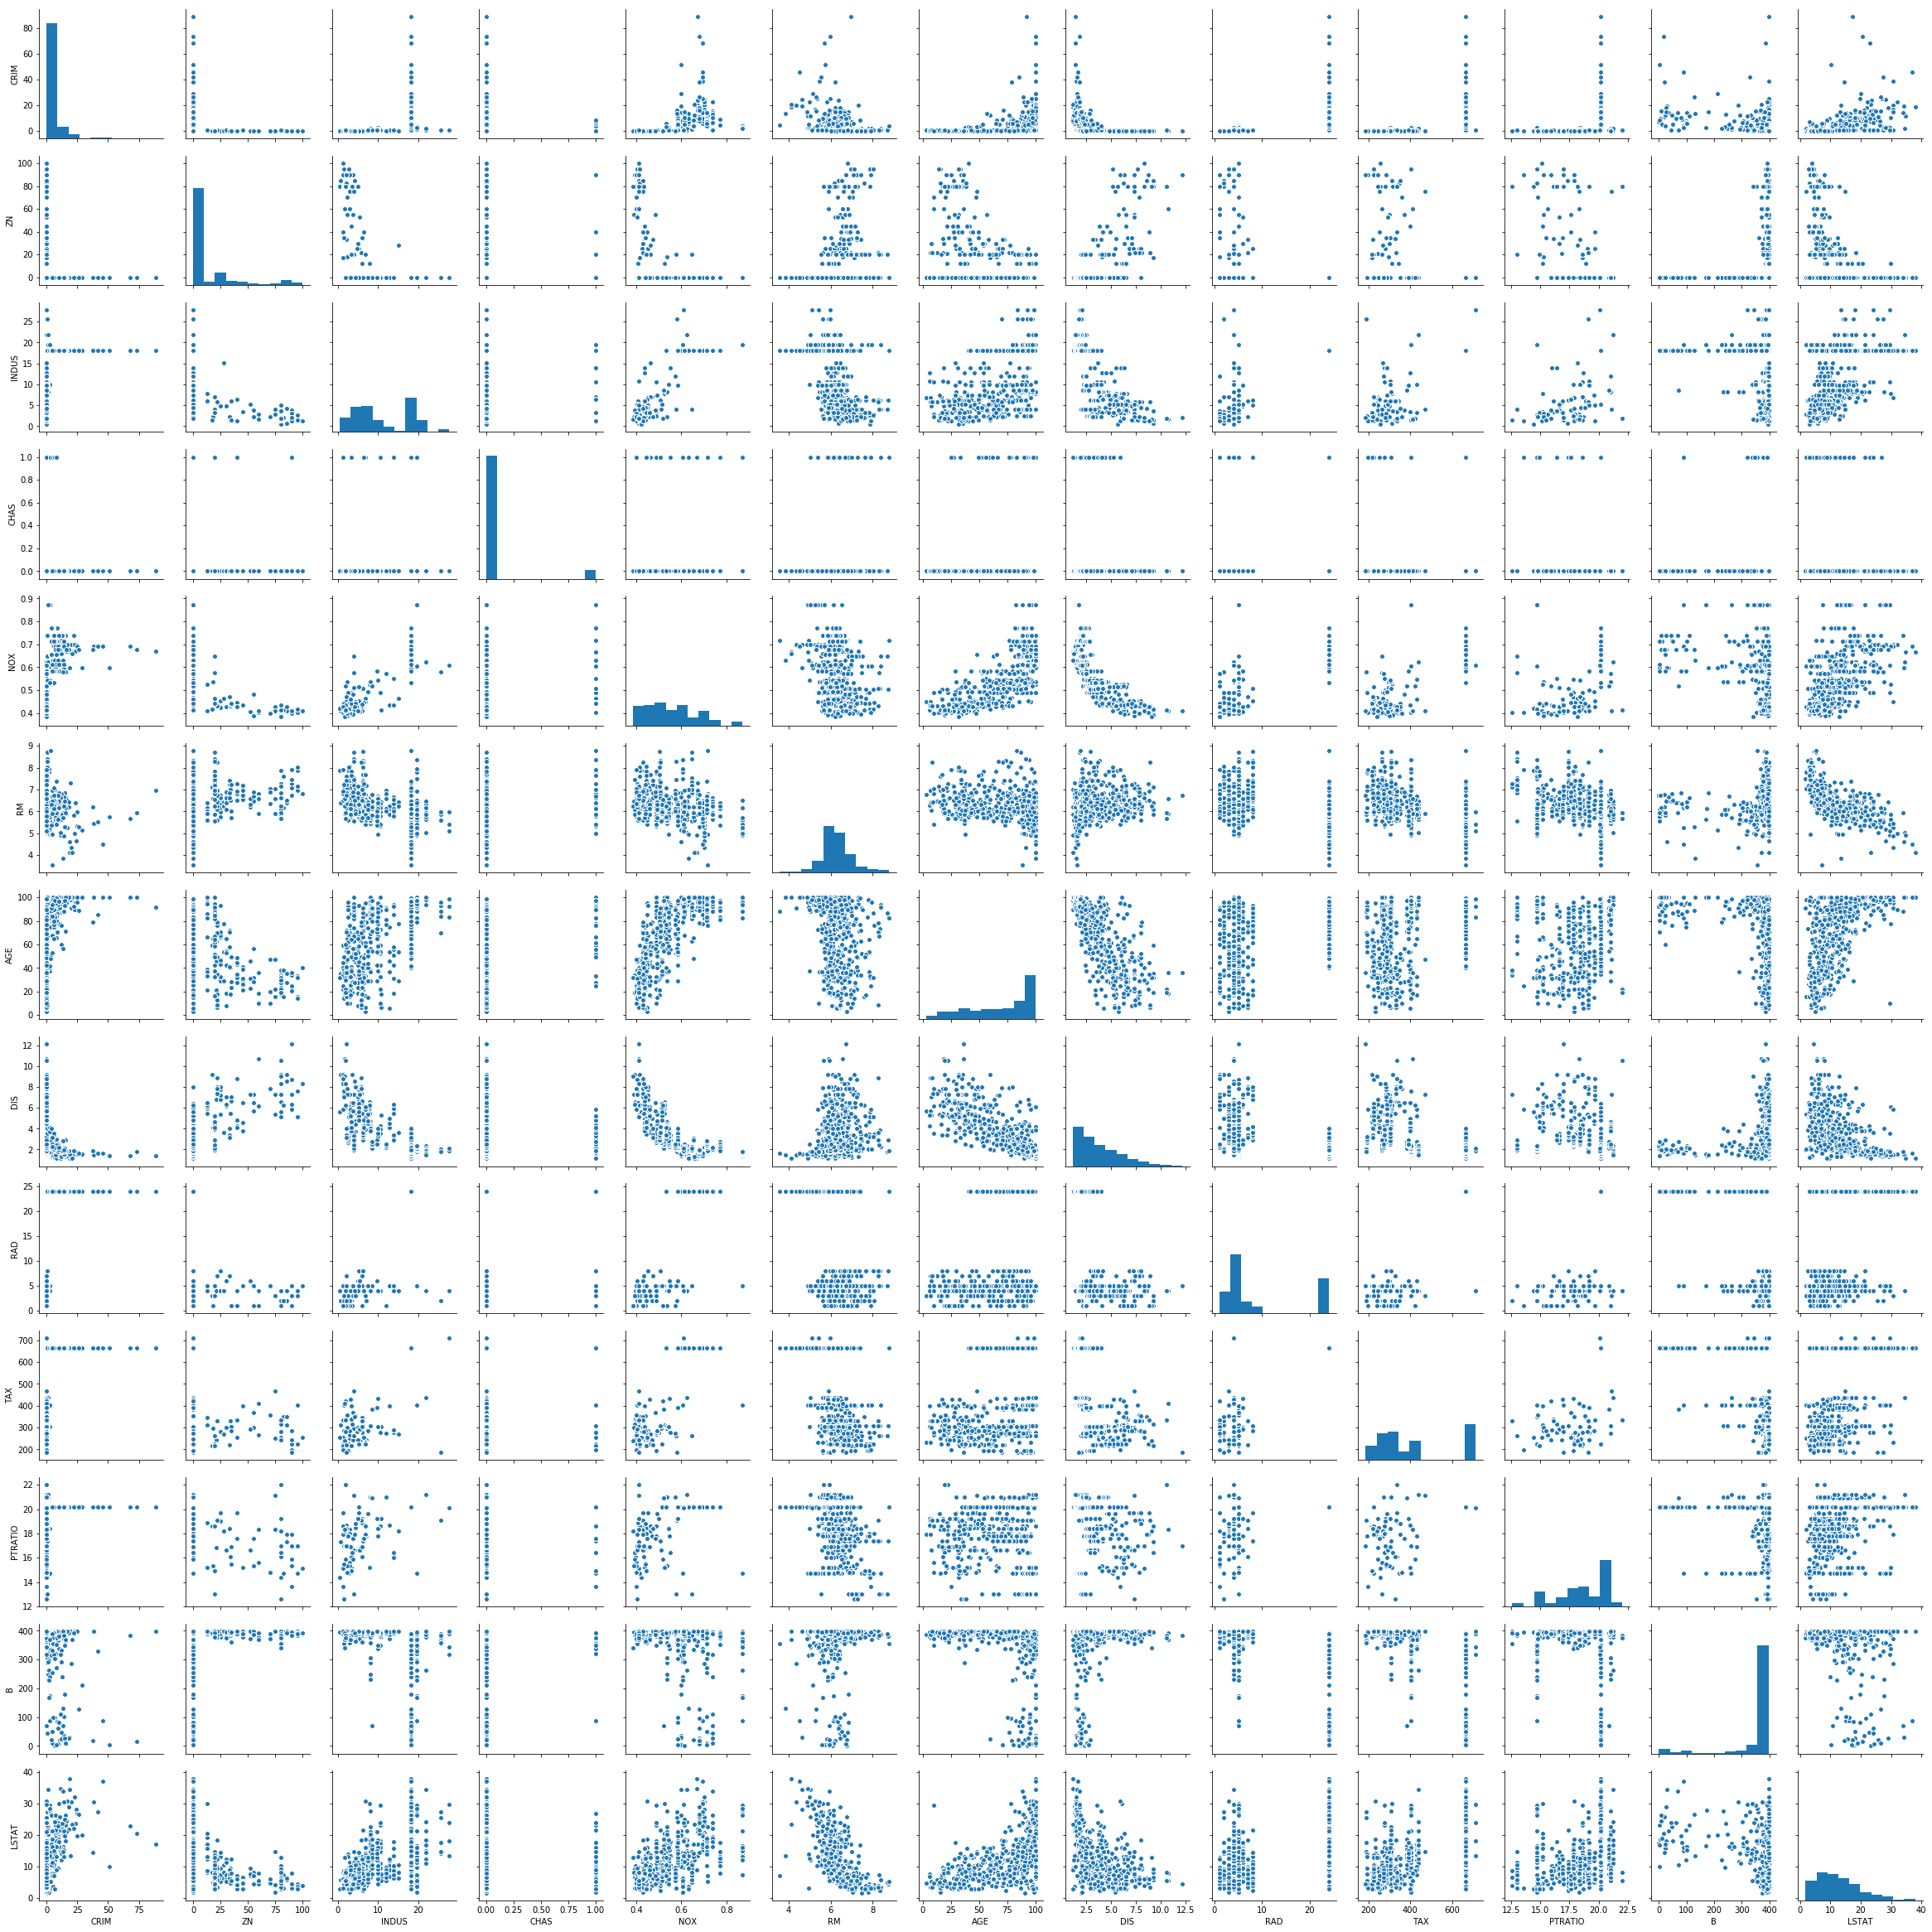

In [12]:
sns.pairplot(data)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)


0it [00:00, ?it/s]
1it [00:00,  4.20it/s]
2it [00:00,  4.41it/s]
3it [00:00,  4.30it/s]
4it [00:00,  4.41it/s]
5it [00:01,  4.42it/s]
6it [00:01,  4.53it/s]
7it [00:01,  4.46it/s]
8it [00:01,  4.51it/s]
9it [00:01,  4.56it/s]
10it [00:02,  4.56it/s]
11it [00:02,  4.56it/s]
12it [00:02,  4.50it/s]
13it [00:02,  4.44it/s]
14it [00:03,  4.43it/s]
15it [00:03,  4.45it/s]
Exception in thread Thread-16:
Traceback (most recent call last):
  File "D:\Users\YA65927.YAMATAKE\AppData\Local\Continuum\Anaconda3\lib\threading.py", line 914, in _bootstrap_inner
    self.run()
  File "D:\Users\YA65927.YAMATAKE\AppData\Local\Continuum\Anaconda3\lib\site-packages\tqdm\_tqdm.py", line 144, in run
    for instance in self.tqdm_cls._instances:
  File "D:\Users\YA65927.YAMATAKE\AppData\Local\Continuum\Anaconda3\lib\_weakrefset.py", line 60, in __iter__
    for itemref in self.data:
RuntimeError: Set changed size during iteration
16it [00:03,  4.40it/s]
354it [01:21,  4.36it/s]
152it [00:36,  4.16it/s]


0.05215081546856983
0.2017462081759329
0.8898430207362866


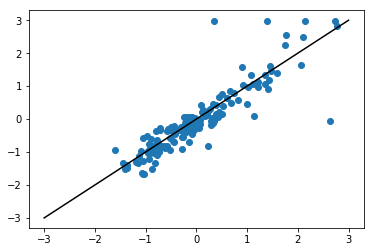

In [44]:
model = JitModel("mahalanobis").fit(X_train,y_train)
y_train_hat = model.predict(X_train)
model = JitModel("mahalanobis").fit(X_train,y_train)
y_test_hat = model.predict(X_test)
plt.plot(y_test_hat,y_test,"o")
plt.plot([-3,3],[-3,3],"k-")

print(mean_squared_error(y_train_hat,y_train))
print(mean_squared_error(y_test_hat,y_test))
print(np.corrcoef(y_test_hat,y_test)[0,1])

<Container object of 13 artists>

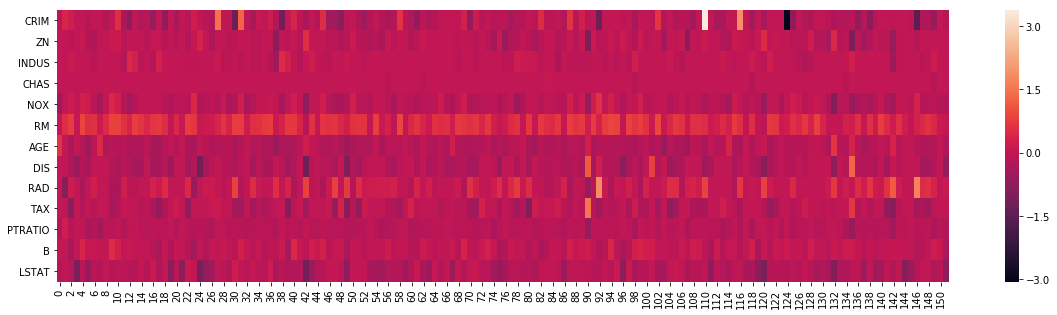

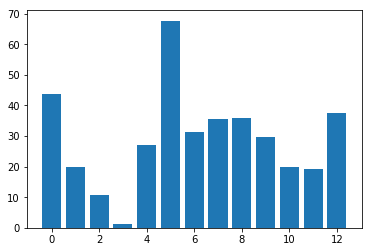

In [45]:
fis = [res["feature_indices"] for res in model.results_]
ws = [res["coef"] for res in model.results_]

C = np.zeros((X.shape[1],y_test.size))
for idx in range(y_test.size):
    C[fis[idx],idx] = ws[idx]

Cdf = pd.DataFrame(C.T,columns=boston.feature_names)

plt.figure(figsize=(20,5))
sns.heatmap(Cdf.T)
plt.figure()
plt.bar(range(X.shape[1]),np.abs(C).sum(axis=1))

Text(0.5,1,'error for feature selection')

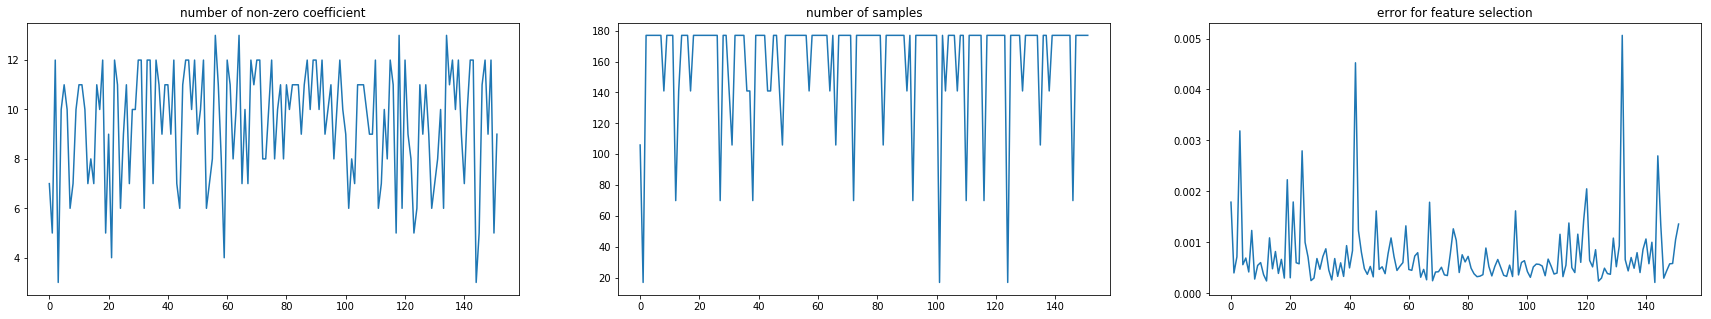

In [47]:
num_coef = [r["coef"].size for r in model.results_]
num_sample = [len(r["local_indices"]) for r in model.results_]
error = [r["feature_selection_error"] for r in model.results_]

f,ax = plt.subplots(1,3,figsize=(30,5))
ax[0].plot(num_coef)
ax[1].plot(num_sample)
ax[2].plot(error)
ax[0].set_title("number of non-zero coefficient")
ax[1].set_title("number of samples")
ax[2].set_title("error for feature selection")

0.23963505580469469
0.3384554568721913
0.8050469515103704


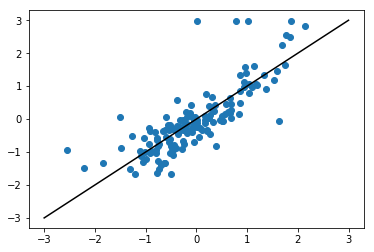

In [30]:
from sklearn.linear_model import LinearRegression,ElasticNetCV,LassoCV,Lasso
# lm = LinearRegression()
lm = ElasticNetCV(cv=10)
# lm = LassoCV(cv=10)
# lm = Lasso(alpha=0.01)
y_train_hat = lm.fit(X_train,y_train).predict(X_train)
y_test_hat = lm.fit(X_train,y_train).predict(X_test)
plt.plot(y_test_hat,y_test,"o")
plt.plot([-3,3],[-3,3],"k-")

print(mean_squared_error(y_train_hat,y_train))
print(mean_squared_error(y_test_hat,y_test))
print(np.corrcoef(y_test_hat,y_test)[0,1])

<Container object of 13 artists>

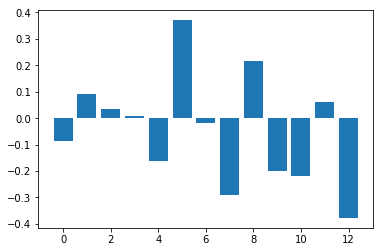

In [31]:
plt.bar(range(X.shape[1]),lm.coef_)

0.01818233236364256
0.1711019870470193
0.90792572899986


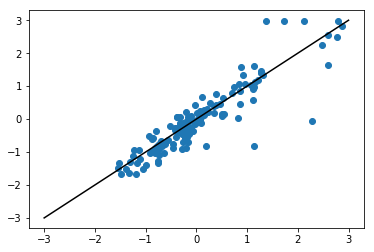

In [18]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=500)
y_train_hat = rf.fit(X_train,y_train).predict(X_train)
y_test_hat = rf.fit(X_train,y_train).predict(X_test)
plt.plot(y_test_hat,y_test,"o") 
plt.plot([-3,3],[-3,3],"k-")

print(mean_squared_error(y_train_hat,y_train))
print(mean_squared_error(y_test_hat,y_test))
print(np.corrcoef(y_test_hat,y_test)[0,1])

<Container object of 13 artists>

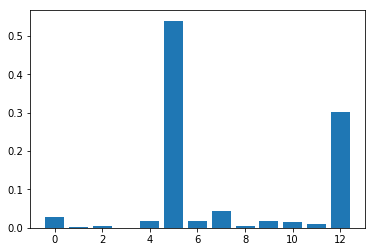

In [22]:
plt.bar(range(X.shape[1]),rf.feature_importances_)